Synthetic grayscale images saved in /Users/vidyadharbendre/workspace/learn_computer_vision_using_examples/notebooks/data/images


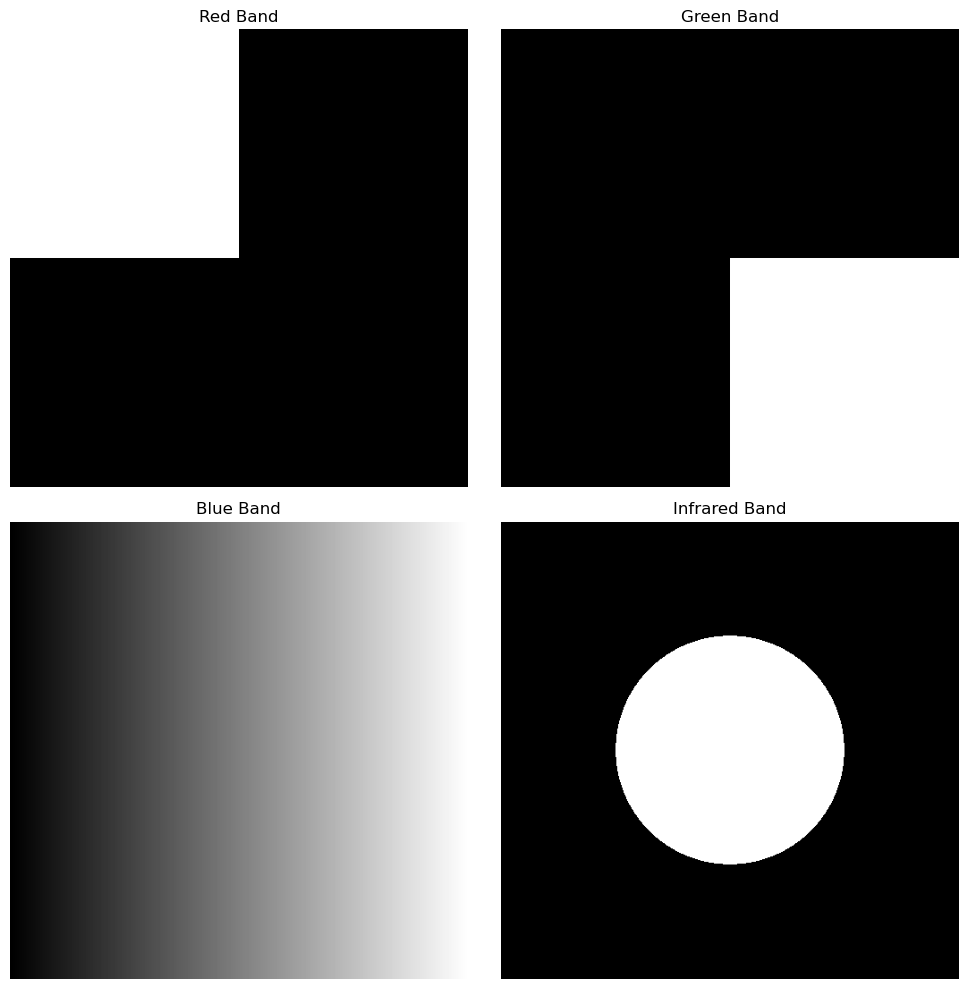

In [3]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

# Directory to save synthetic images
data_dir = os.path.join(os.getcwd(), 'data', 'images')
os.makedirs(data_dir, exist_ok=True)

# Generate synthetic grayscale images
height, width = 512, 512  # Image dimensions

# Red band (high intensity in top-left region)
red_band = np.zeros((height, width), dtype=np.uint8)
red_band[:height//2, :width//2] = 255
cv2.imwrite(os.path.join(data_dir, 'red_band.jpg'), red_band)

# Green band (high intensity in bottom-right region)
green_band = np.zeros((height, width), dtype=np.uint8)
green_band[height//2:, width//2:] = 255
cv2.imwrite(os.path.join(data_dir, 'green_band.jpg'), green_band)

# Blue band (gradient intensity)
blue_band = np.tile(np.linspace(0, 255, width, dtype=np.uint8), (height, 1))
cv2.imwrite(os.path.join(data_dir, 'blue_band.jpg'), blue_band)

# Infrared band (circular intensity pattern)
x = np.linspace(-1, 1, width)
y = np.linspace(-1, 1, height)
x, y = np.meshgrid(x, y)
infrared_band = ((np.sqrt(x**2 + y**2) <= 0.5) * 255).astype(np.uint8)
cv2.imwrite(os.path.join(data_dir, 'infrared_band.jpg'), infrared_band)

print(f"Synthetic grayscale images saved in {data_dir}")

# Display the images using matplotlib
images = {
    'Red Band': red_band,
    'Green Band': green_band,
    'Blue Band': blue_band,
    'Infrared Band': infrared_band
}

plt.figure(figsize=(10, 10))
for idx, (title, image) in enumerate(images.items(), 1):
    plt.subplot(2, 2, idx)
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()